In [286]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

In [287]:
from matplotlib import animation, rc
from IPython.display import HTML

In [411]:
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
# animation function. This is called sequentially
def animate(i):
    x = []
    y = []
    with open('./rect-optim%s.txt' % str(i+1).zfill(3)) as f:
        reader = csv.reader(f, delimiter=' ')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    line.set_data(x, y)
    return (line,)

In [303]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

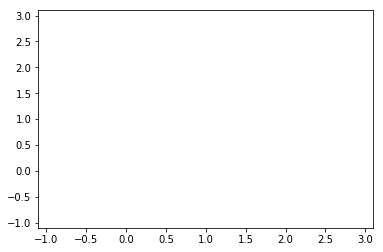

In [393]:
fig, ax = plt.subplots()

ax.set_xlim((-1.1, 3.1))
ax.set_ylim((-1.1, 3.1))

line, = ax.plot([], [], lw=2)

In [414]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                           frames=260, interval=100, blit=True, repeat=False)
HTML(anim.to_html5_video())

In [371]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
anim.save(filename='filename.mp4', writer=writer)